In [1]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r'tweets\train.csv')

In [3]:
df.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [6]:
# x = df['Sentences']
# y = df['Sentiment']

x = df['selected_text']
y = df['sentiment']

In [7]:
print(x.isna().sum(),y.isna().sum())

0 0


In [8]:
type(x)

pandas.core.series.Series

In [9]:
print(y.count())
print(y.nunique())
print(y.unique())
print('Positive',(y == 'positive').sum())
print('Negative',(y == 'negative').sum())
print('Neutral',(y == 'neutral').sum())



27480
3
['neutral' 'negative' 'positive']
Positive 8582
Negative 7781
Neutral 11117


In [ ]:
# from imblearn.under_sampling import RandomUnderSampler

# # # Convert X to DataFrame if it's a Series
# # if isinstance(x, pd.Series):
# #     x = pd.DataFrame(x)

# # Initialize RandomUnderSampler
# under_sampler = RandomUnderSampler(random_state=42)

# # Resample the dataset
# X_resampled, y_resampled = under_sampler.fit_resample(x, y)

# # Check the class distribution before and after undersampling
# print("Before undersampling:")
# print(pd.Series(y).value_counts())

# print("\nAfter undersampling:")
# print(pd.Series(y_resampled).value_counts())

In [ ]:
# concatenated_df_rows = pd.concat([X_resampled, y_resampled],axis = 1)

In [ ]:
# concatenated_df_rows.to_csv("new_training.csv")
# 

In [ ]:
# new_df = pd.read_csv("new_training.csv")
# new_df.columns

In [ ]:
# x = new_df['selected_text']
# y = new_df['sentiment']

In [58]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [59]:
print(len(y_train),len(X_train))

21984 21984


In [60]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Text preprocessing (vectorization)
    ('clf', MultinomialNB())       # Classifier
])



In [61]:
# Train the pipeline
pipeline.fit(X_train, y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [62]:
# Evaluate the model
predictions = pipeline.predict(X_test)
print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

    negative       0.92      0.58      0.71      1572
     neutral       0.68      0.96      0.79      2236
    positive       0.92      0.73      0.81      1688

    accuracy                           0.78      5496
   macro avg       0.84      0.76      0.77      5496
weighted avg       0.82      0.78      0.78      5496



In [63]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.7789301310043668


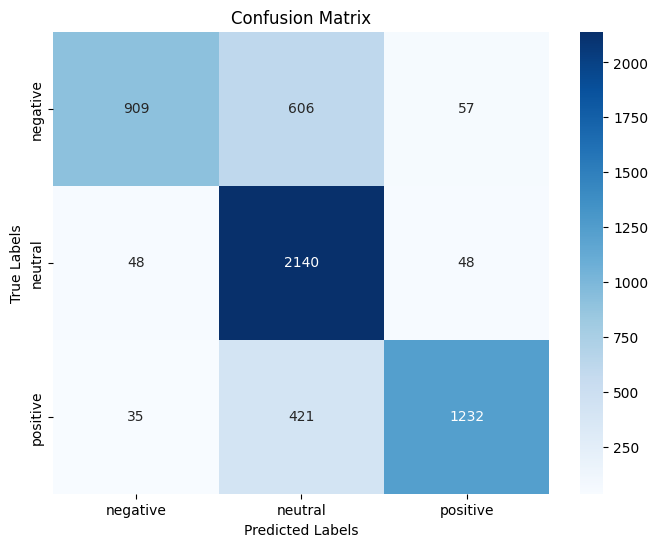

In [64]:
conf_matrix = confusion_matrix(y_test, predictions)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [65]:
input_texts = [
    "Every day is a new opportunity to embrace positivity and create a brighter future for yourself and those around you.",
    "Life is a journey filled with ups and downs. Embrace the ebb and flow, knowing that each experience shapes who you are.",
    "i feel sad today",
    "i am very depressed",
    'positivity'
    "i will kill you",
    'FalseThe package I ordered online got lost in transit.',
    'lost'
]
predictions = pipeline.predict(input_texts)
predictions

array(['neutral', 'neutral', 'negative', 'negative', 'negative',
       'neutral', 'negative'], dtype='<U8')

In [66]:
# Save the pipeline for later use
joblib.dump(pipeline, 'sentiment_analysis_pipeline_bayes.joblib')

['sentiment_analysis_pipeline_bayes.joblib']

In [67]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Text preprocessing (vectorization)
    ('clf', SVC())       # Classifier
])



In [68]:
svm_pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [69]:
# Train the pipeline
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [70]:
# Evaluate the model
svm_predictions = svm_pipeline.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

    negative       0.84      0.78      0.81      1572
     neutral       0.79      0.91      0.84      2236
    positive       0.94      0.80      0.86      1688

    accuracy                           0.84      5496
   macro avg       0.85      0.83      0.84      5496
weighted avg       0.85      0.84      0.84      5496



In [71]:
accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.839155749636099


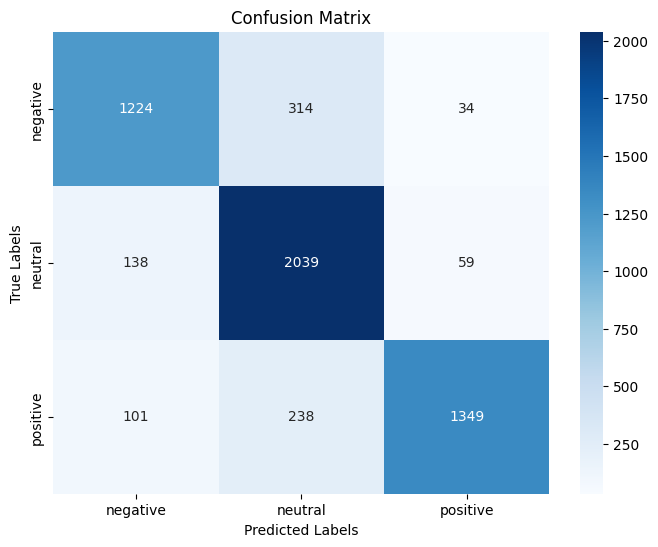

In [72]:
conf_matrix = confusion_matrix(y_test, svm_predictions)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [73]:
input_texts = [
    "Every day is a new opportunity to embrace positivity and create a brighter future for yourself and those around you.",
    "Life is a journey filled with ups and downs. Embrace the ebb and flow, knowing that each experience shapes who you are.",
    "i feel sad today",
    "i am very depressed",
    'positivity'
    "i will kill you",
    'FalseThe package I ordered online got lost in transit.',
    'lost'
]
predictions = svm_pipeline.predict(input_texts)
predictions

array(['neutral', 'neutral', 'negative', 'negative', 'neutral', 'neutral',
       'negative'], dtype=object)

In [ ]:
import csv

misclassified_data = []

# Iterate through the test set and make predictions
for i, text in enumerate(X_test):
    prediction = model.predict(X_test_counts[i])[0]
    actual = y_test.iloc[i]
    
    # Check if prediction is correct
    if prediction != actual:
        misclassified_data.append({'Text': text, 'Actual': actual, 'Predicted': prediction})

# Write misclassified data to a CSV file
with open('misclassified_data.csv', mode='w', newline='', encoding='utf-8') as file:
    fieldnames = ['Text', 'Actual', 'Predicted']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    
    writer.writeheader()
    for data in misclassified_data:
        writer.writerow(data)

print("Misclassified data saved to 'misclassified_data.csv'")